# **Importing Necessary Modules**

In [37]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# **Reading the Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/health/healthcare_dataset.csv')
df.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


In [3]:
# Checking the Dimensions
df.shape

(5000, 15)

**There are 5000 samples with 15 features in our dataset**

In [4]:
# Checking the dtypes basic info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  4750 non-null   float64
 2   BloodPressure        4750 non-null   float64
 3   Cholesterol          4750 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   object 
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   object 
 12  StressLevel          5000 non-null   object 
 13  HealthIns            5000 non-null   object 
 14  Disease              3742 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

**All dtypes are correct**

# **Exploratory Data Analysis**

In [5]:
# Check for duplicates
df.duplicated().any()

False

**No duplicates are present**

In [6]:
# statistical summary
df.describe()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore
count,5000.000000,4750.000000,4750.000000,4750.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.805600,27.332873,129.749053,199.611158,137.440600,146.573200,80.342000,0.510400,7.482200,4.485400
std,17.906991,7.190172,28.671508,58.173633,47.448072,82.623127,13.914919,0.499942,2.281562,2.852405
min,18.000000,15.000291,80.000000,100.000000,70.000000,15.000000,60.000000,0.000000,4.000000,0.000000
25%,34.000000,21.049709,105.000000,149.000000,103.000000,78.000000,70.000000,0.000000,5.000000,2.000000
50%,49.000000,27.218082,130.000000,201.000000,136.000000,144.000000,80.000000,1.000000,7.000000,4.000000
75%,64.000000,33.530189,155.000000,250.000000,167.000000,213.000000,89.000000,1.000000,9.000000,7.000000
max,79.000000,39.988943,179.000000,299.000000,582.000000,744.000000,198.000000,1.000000,11.000000,9.000000


**We can see that BMI, BloodPressure and Cholesterol have missing values there, Later we will impute them with suitable values**

# **Heatmap To Visualize the Missing Values**

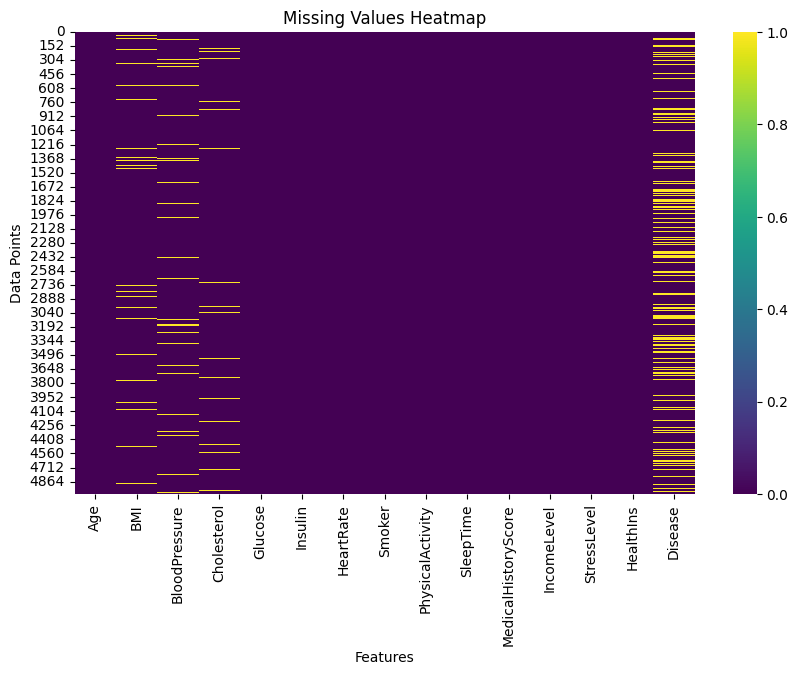

Number of missing values per column:
Age                       0
BMI                     250
BloodPressure           250
Cholesterol             250
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64


In [7]:
missing_values = df.isnull()

# Plotting missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

# Print the number of missing values for each column
missing_count = df.isnull().sum()
print("Number of missing values per column:")
print(missing_count)

**It can be seen that BMI, BloodPressure, Cholesterol and Disease has missing values there.**

**The Disease column is showing 1258 values as missing because there are Nan values in those samples, Later we will impute them with suitable values**

# **Filling the Missing Values**

In [8]:
# Filling missing values in the 'Disease' column with 'None'
df['Disease'] = df['Disease'].fillna('None')

# Filling missing values with median in specified columns
for column in ['BMI', 'BloodPressure', 'Cholesterol']:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)


# **Heatmap To Visualize the Missing Values After Imputation**

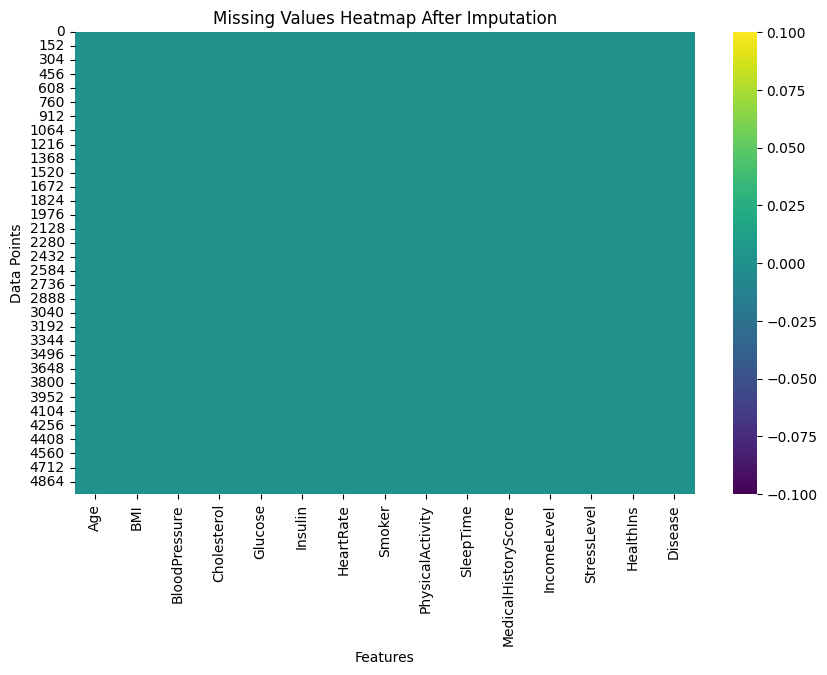

Number of missing values per column:
Age                    0
BMI                    0
BloodPressure          0
Cholesterol            0
Glucose                0
Insulin                0
HeartRate              0
Smoker                 0
PhysicalActivity       0
SleepTime              0
MedicalHistoryScore    0
IncomeLevel            0
StressLevel            0
HealthIns              0
Disease                0
dtype: int64


In [9]:
missing_values = df.isnull()

# Plotting missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap After Imputation')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

# Print the number of missing values for each column
missing_count = df.isnull().sum()
print("Number of missing values per column:")
print(missing_count)

**Now there are no missing values in our dataset**

# **Seperating Features into Numerical and Categorical Features**

In [10]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Select categorical features
categorical_features = df.select_dtypes(include=['object'])

print(f'Numerical Features are: {len(numerical_features.columns)}')
print(f'Categorical Features are: {len(categorical_features.columns)}')

Numerical Features are: 10
Categorical Features are: 5


# **Checking for Skewness**

In [11]:
numerical_features.skew()

Age                   -0.013819
BMI                    0.040496
BloodPressure         -0.017616
Cholesterol           -0.010217
Glucose                2.763480
Insulin                0.838297
HeartRate              1.901799
Smoker                -0.041621
SleepTime              0.024203
MedicalHistoryScore   -0.004559
dtype: float64

# **Plotting Histograms To See The Distribution of Numerical Features**

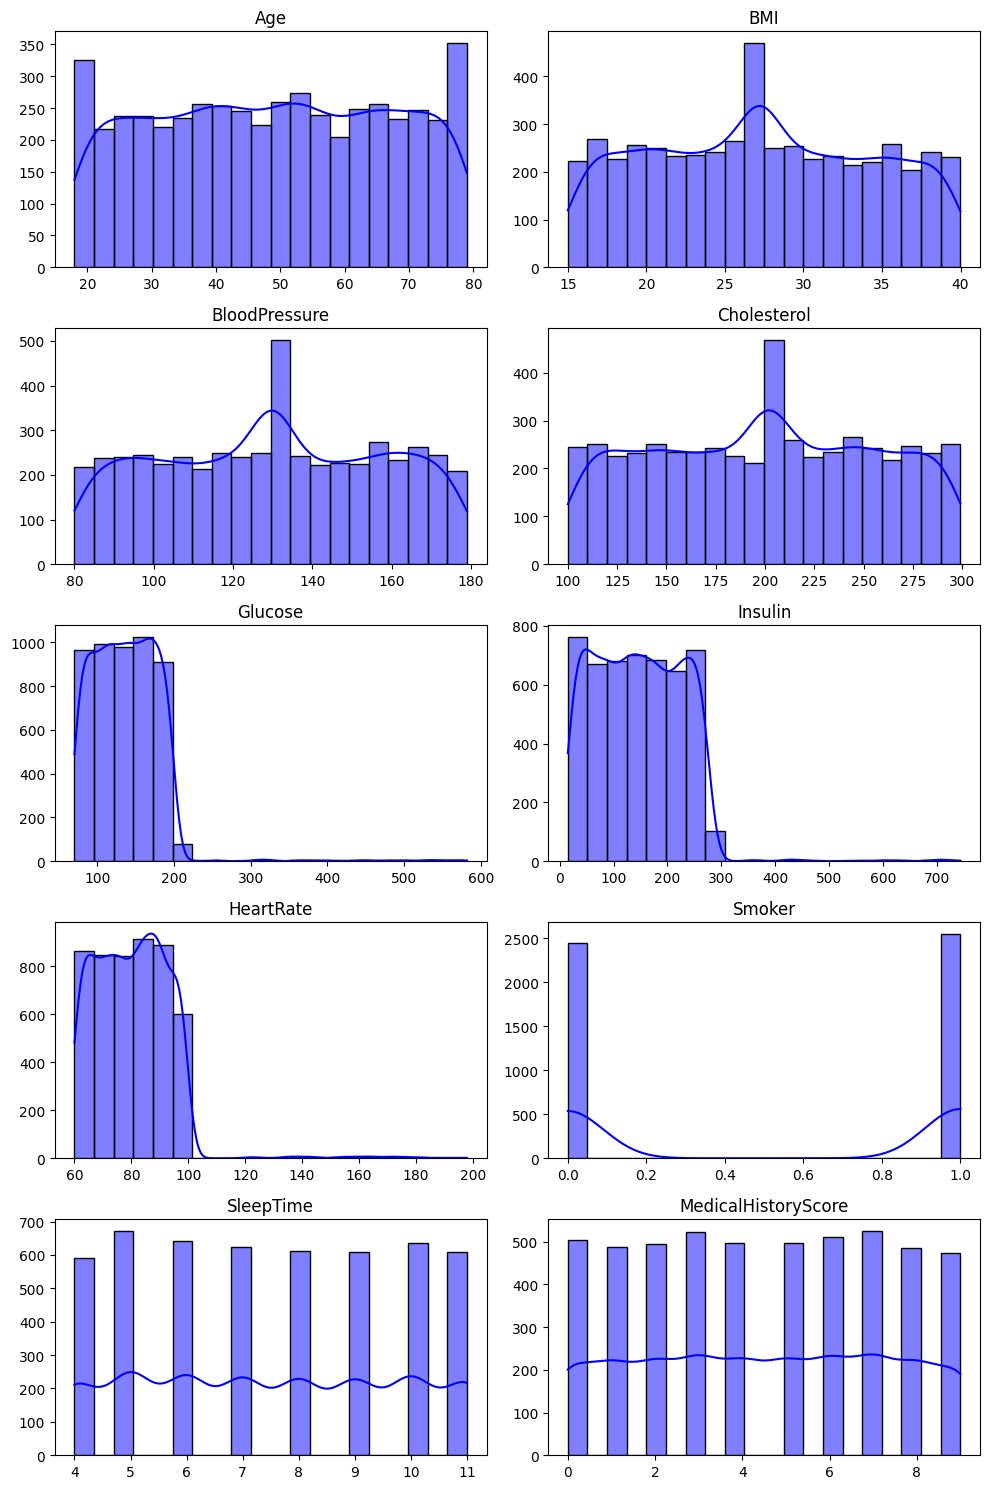

In [12]:
# Define the number of bins
num_bins = 20

# list of numerical feature names
numerical_feature_names = numerical_features.columns

# Number of rows needed for subplots
num_rows = (len(numerical_feature_names) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 3 * num_rows))
axes = axes.flatten()

# Plot histograms
for i, feature in enumerate(numerical_feature_names):
    sns.histplot(numerical_features[feature], bins=num_bins, kde=True, ax=axes[i], color = 'blue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide empty subplots if any
for j in range(len(numerical_feature_names), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# **Plotting the Box plots**

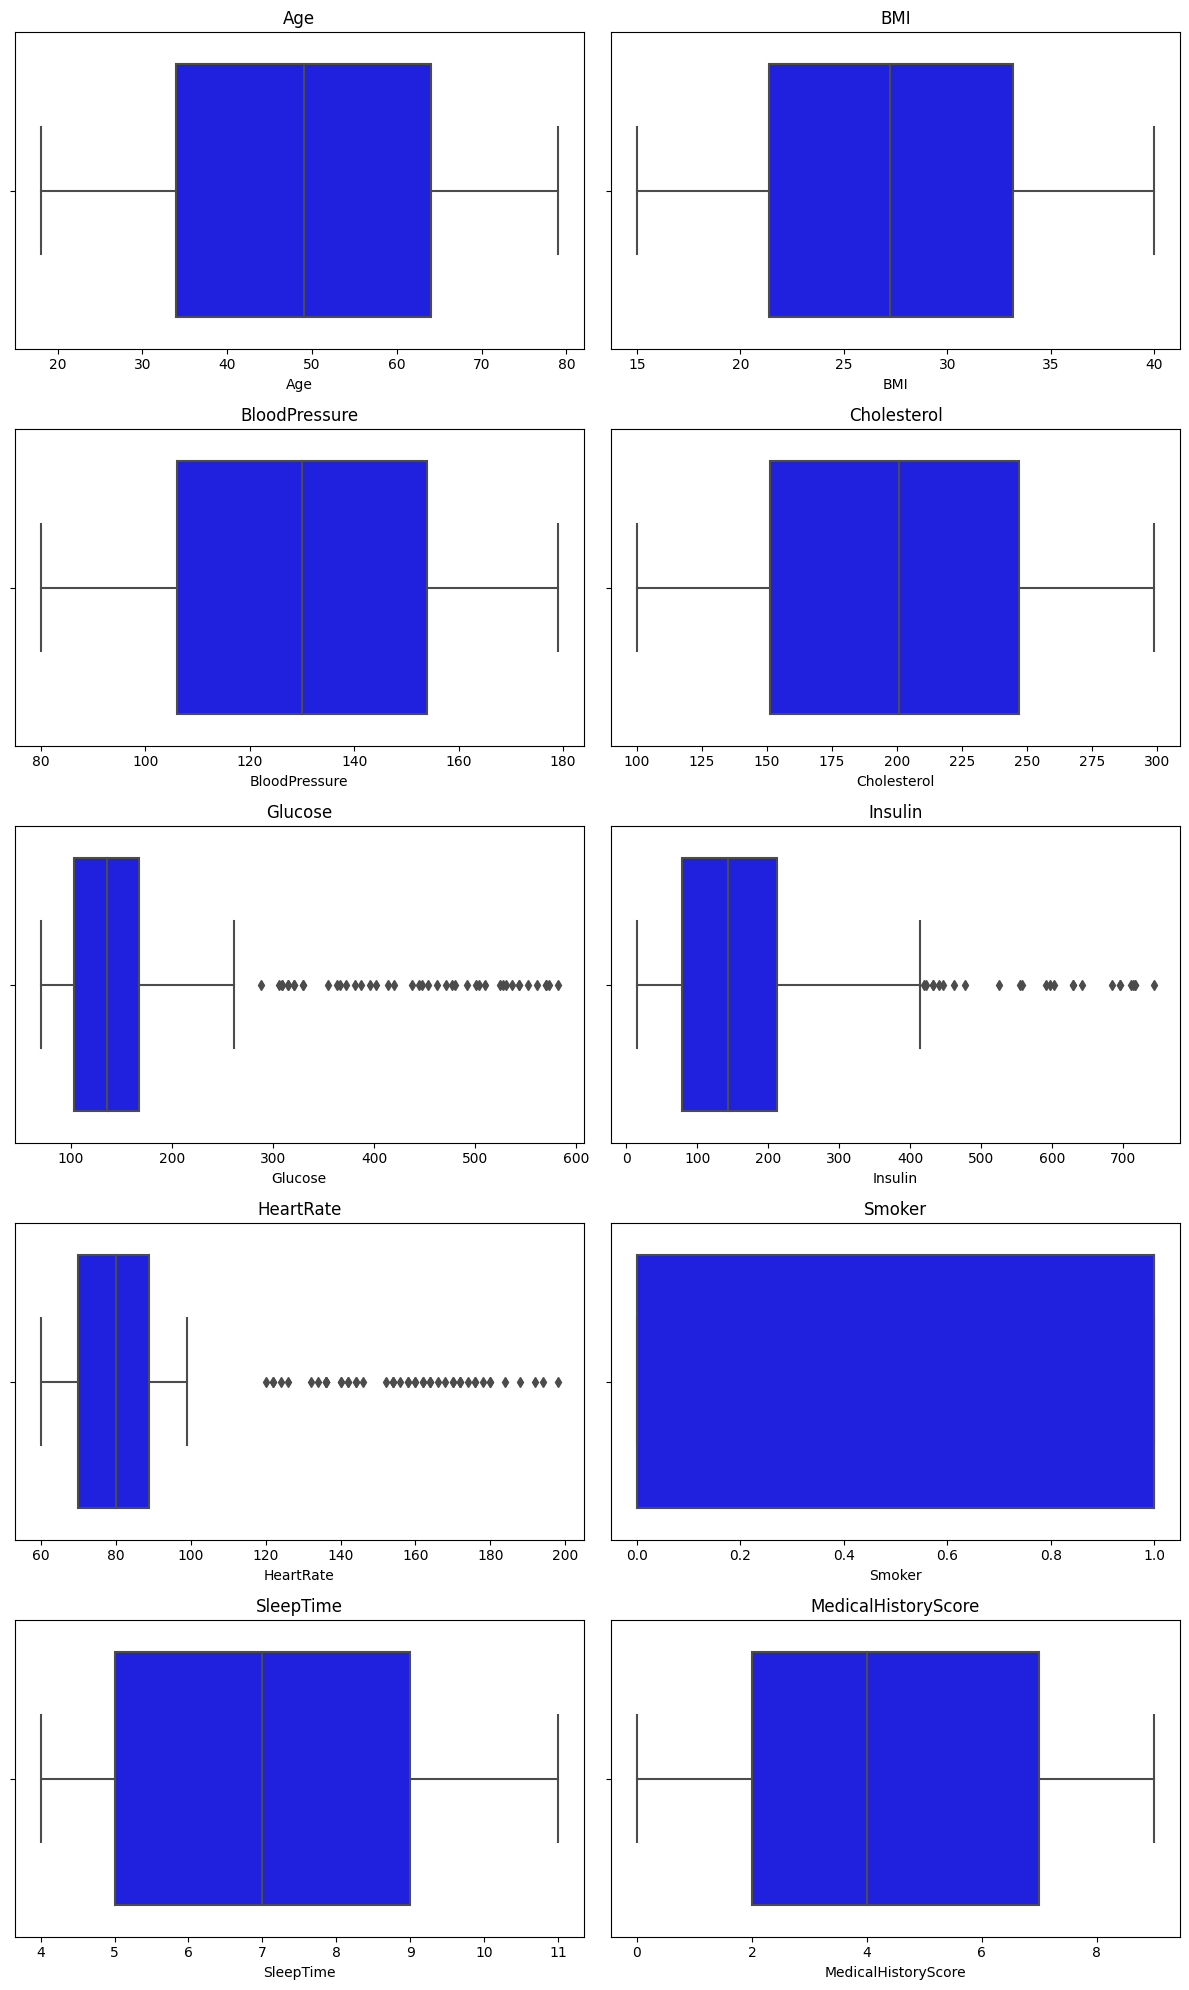

In [13]:
# Define the number of columns and rows for the subplot grid
num_cols = 2
num_rows = (len(numerical_features.columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Flatten the axes array if it's not already flat
axes = axes.flatten()

# Loop through each column in the DataFrame and create a box plot
for i, col in enumerate(numerical_features.columns):
    sns.boxplot(x=df[col], ax=axes[i], color = 'blue')
    axes[i].set_title(col)

# Hide empty subplots
for j in range(len(numerical_features.columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**It can be seen that Glucose, Insulin and HeartRate has outliers there, so we will cap them with IQR (Inter Quartile Range) Method**

# **Capping the Outliers with IQR Method**

In [14]:
def cap_outliers_iqr(df, features):
    new_df_cap = df.copy()
    for feature in features:
        # Finding the IQR
        percentile25 = df[feature].quantile(0.25)
        percentile75 = df[feature].quantile(0.75)
        iqr = percentile75 - percentile25

        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr

        # Finding Outliers
        outliers_high = df[df[feature] > upper_limit]
        outliers_low = df[df[feature] < lower_limit]

        # Capping
        new_df_cap[feature] = np.where(new_df_cap[feature] > upper_limit,
                                       upper_limit,
                                       np.where(new_df_cap[feature] < lower_limit,
                                                lower_limit,
                                                new_df_cap[feature]))
    return new_df_cap


features_to_cap = ['Glucose', 'Insulin', 'HeartRate']
df = cap_outliers_iqr(df, features_to_cap)


# **Again Plot the Box Plots**

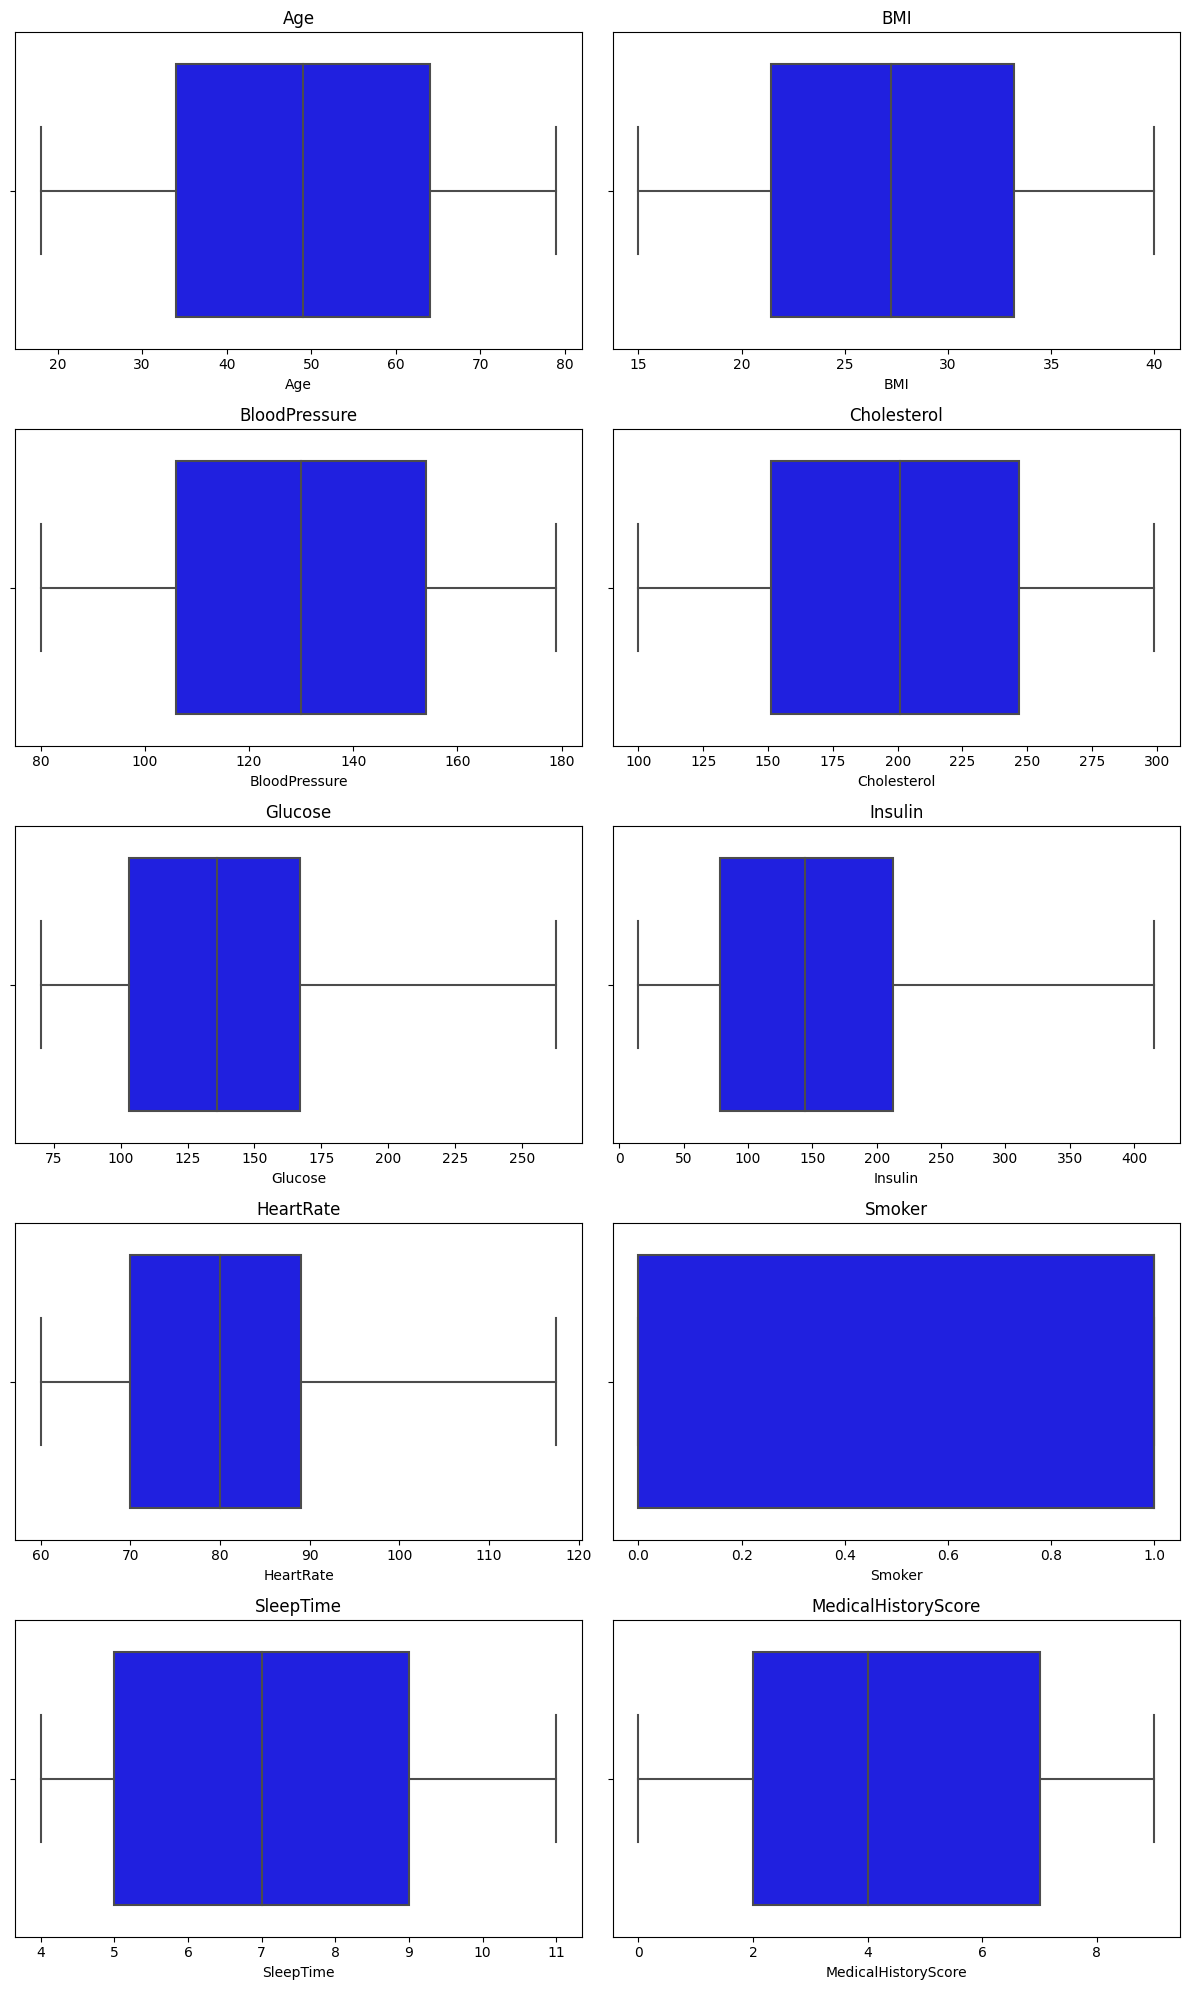

In [15]:
# Define the number of columns and rows for the subplot grid
num_cols = 2
num_rows = (len(numerical_features.columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Flatten the axes array if it's not already flat
axes = axes.flatten()

# Loop through each column in the DataFrame and create a box plot
for i, col in enumerate(numerical_features.columns):
    sns.boxplot(x=df[col], ax=axes[i], color = 'blue')
    axes[i].set_title(col)

# Hide empty subplots
for j in range(len(numerical_features.columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Now there are no outliers**

# **Again Plot the Histograms to See the Distributions After Capping**

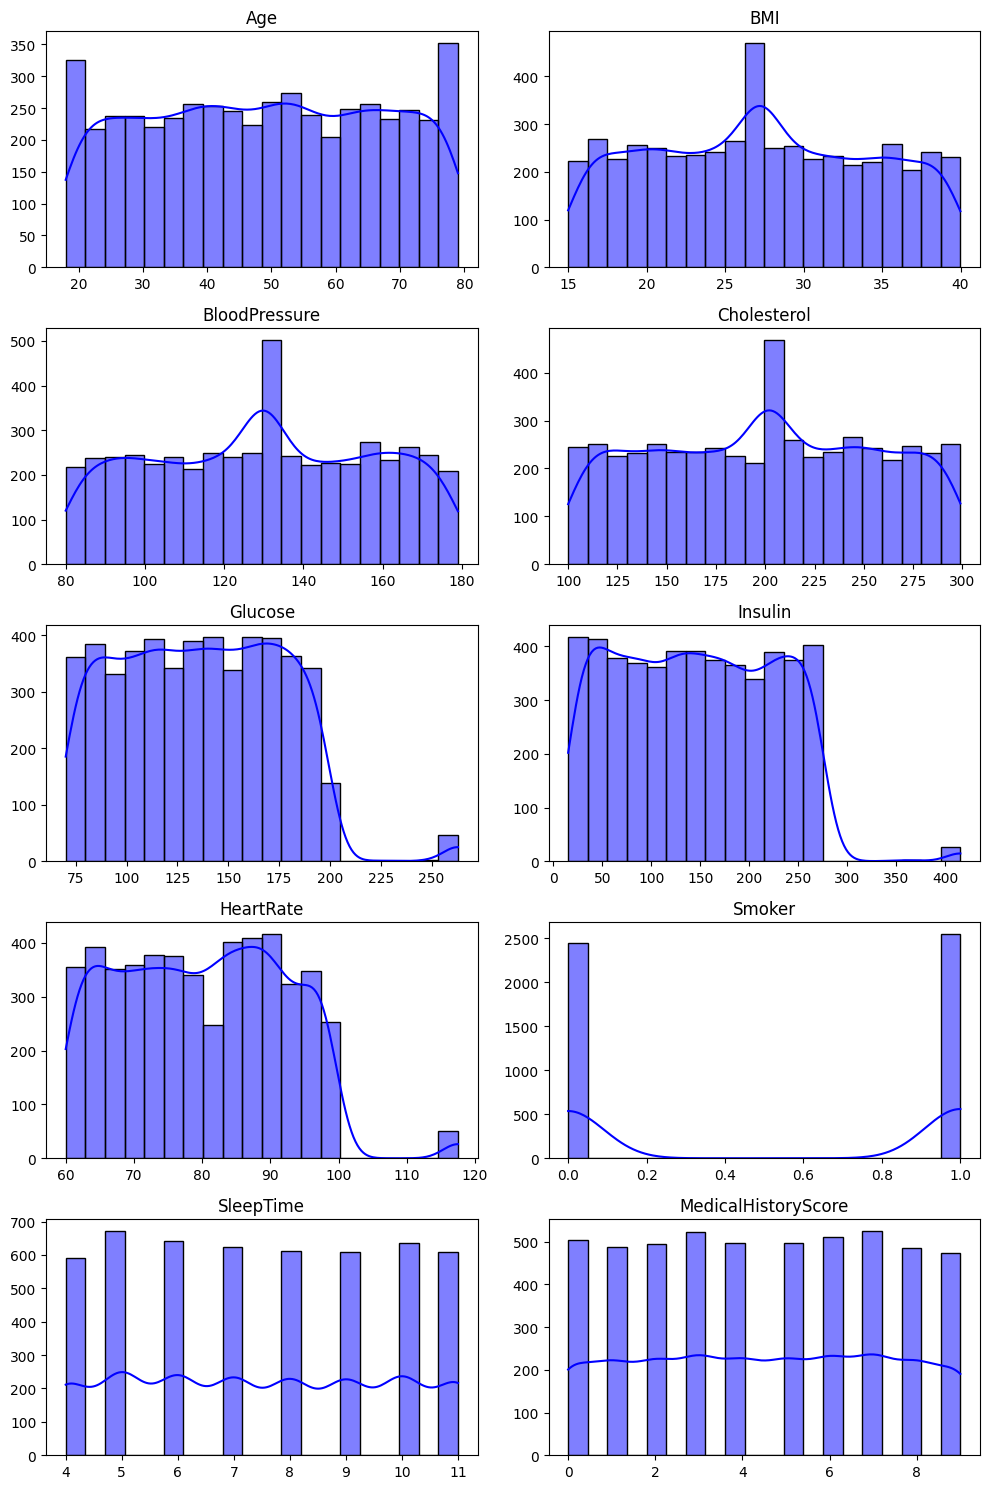

In [16]:
# Define the number of bins
num_bins = 20

# list of numerical feature names
numerical_feature_names = numerical_features.columns

# Number of rows needed for subplots
num_rows = (len(numerical_feature_names) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 3 * num_rows))
axes = axes.flatten()

# Plot histograms
for i, feature in enumerate(numerical_feature_names):
    sns.histplot(df[feature], bins=num_bins, kde=True, ax=axes[i], color = 'blue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide empty subplots if any
for j in range(len(numerical_feature_names), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# **Plotting Bar Plots To See The Distribution of Categorical Features**

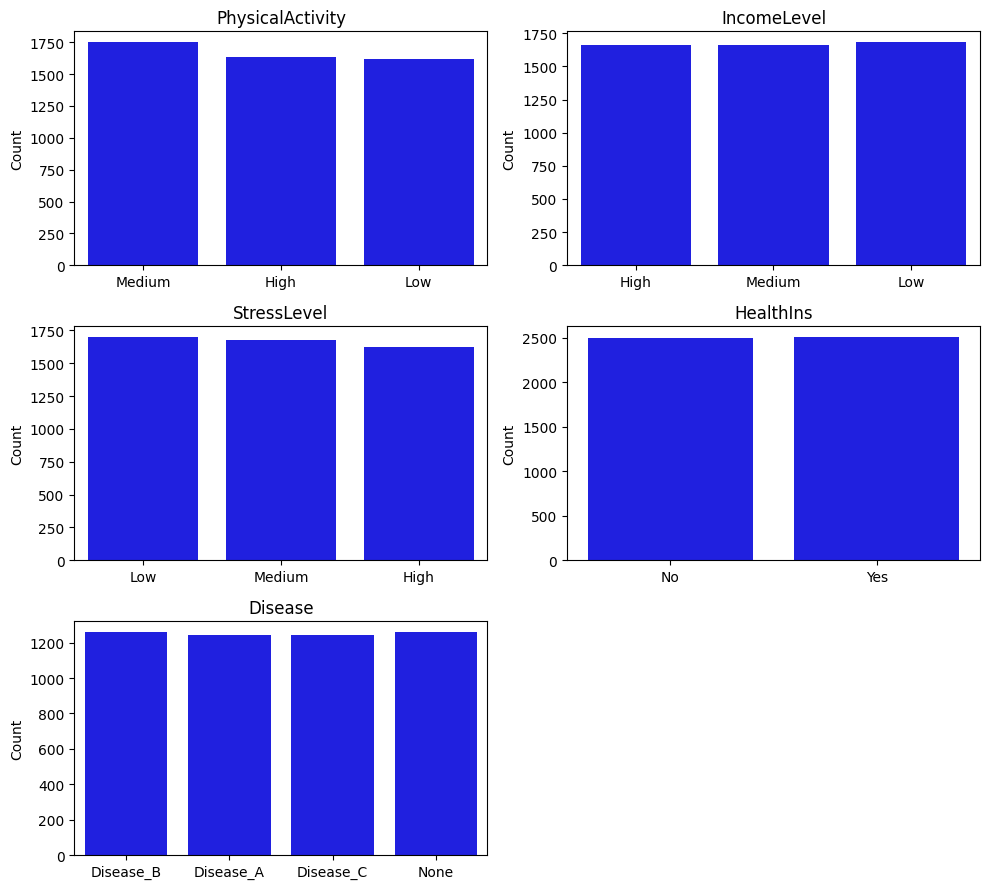

In [17]:
# list of categorical feature names
categorical_feature_names = categorical_features.columns

# number of rows needed for subplots
num_rows = (len(categorical_feature_names) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 3 * num_rows))
axes = axes.flatten()

# Plot bar plots
for i, feature in enumerate(categorical_feature_names):
    sns.countplot(x=feature, data=categorical_features, ax=axes[i], color = 'blue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide empty subplots if any
for j in range(len(categorical_feature_names), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

**We can see the the StressLevel feature is not imbalanced, which is a good sign!**

In [18]:
# Total Values in each class of StressLevel
df['StressLevel'].value_counts()

StressLevel
Low       1696
Medium    1678
High      1626
Name: count, dtype: int64

# **Pearson Correlation Heatmap**

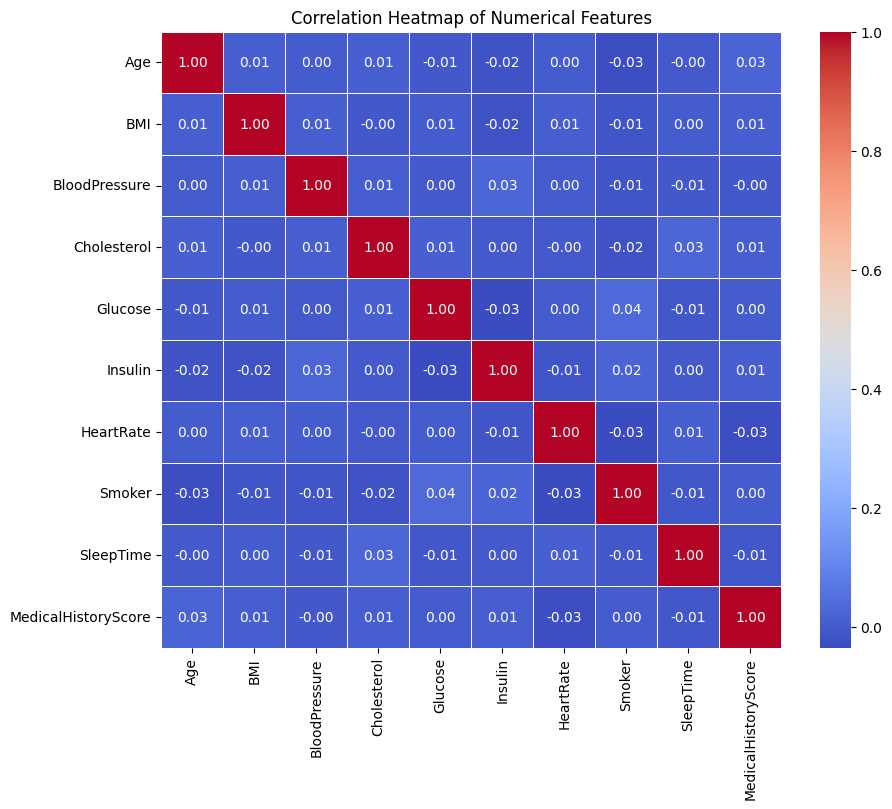

In [19]:
def plot_numerical_corr_heatmap(df):
    # Selecting only numerical features
    numerical_df = df.select_dtypes(include=['int', 'float'])

    # Calculating correlation matrix
    corr_matrix = numerical_df.corr()

    # Plotting correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

plot_numerical_corr_heatmap(df)


# **Encoding the Features**

In [20]:
# Initialize OneHotEncoder and LabelEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

# Select columns to one-hot encode and label encode
one_hot_columns = ['PhysicalActivity', 'IncomeLevel', 'Disease' ]
label_encode_columns = ['HealthIns', 'StressLevel']

# Apply OneHotEncoder to the selected columns
one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_columns])
# Use get_feature_names_out for compatibility with newer sklearn versions
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

# Apply LabelEncoder to the selected columns
for column in label_encode_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Combine the one-hot encoded columns back with the original DataFrame
# Drop the original columns that were one-hot encoded
df.drop(columns=one_hot_columns, inplace=True)

# Concatenate the encoded columns with the rest of the DataFrame
encoded_df = pd.concat([df, one_hot_encoded_df], axis=1)

In [21]:
# Printing the encoded dataframe
encoded_df.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore,...,PhysicalActivity_High,PhysicalActivity_Low,PhysicalActivity_Medium,IncomeLevel_High,IncomeLevel_Low,IncomeLevel_Medium,Disease_Disease_A,Disease_Disease_B,Disease_Disease_C,Disease_None
0,56,27.577099,88.0,108.0,92.0,171.0,75.0,0,9,5,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,69,26.233744,88.0,252.0,102.0,179.0,71.0,0,9,3,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,46,29.646620,152.0,141.0,89.0,198.0,90.0,1,5,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,32,30.619597,106.0,273.0,159.0,222.0,64.0,1,7,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,60,16.794395,96.0,172.0,173.0,30.0,99.0,1,7,3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# Column names after Encoding
encoded_df.columns


Index(['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin',
       'HeartRate', 'Smoker', 'SleepTime', 'MedicalHistoryScore',
       'StressLevel', 'HealthIns', 'PhysicalActivity_High',
       'PhysicalActivity_Low', 'PhysicalActivity_Medium', 'IncomeLevel_High',
       'IncomeLevel_Low', 'IncomeLevel_Medium', 'Disease_Disease_A',
       'Disease_Disease_B', 'Disease_Disease_C', 'Disease_None'],
      dtype='object')

# **Splitting the Dataset into Dependent and Independent Features**

In [29]:
# Split the data
X = encoded_df.drop('StressLevel', axis=1)
y = encoded_df['StressLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Feature Selection Using SelectKBest**

In [30]:
# select top 15 features

k = 15
selector = SelectKBest(score_func = mutual_info_classif, k = k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Apply the same feature selection to the testing data
X_test_selected = selector.transform(X_test)

# **Scaling Down the Data**

In [31]:
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_selected)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test_selected)

# **Selection of Hyperparameters for the ML models using GridSearchCV**

In [35]:
# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV model
start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

# Get the best hyperparameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Hyperparameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score:.4f}')
print(f'Time taken for GridSearchCV: {end_time - start_time:.2f} seconds')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

# **Train and test the machine learning models with different splits and cross-validation**

In [39]:
# Train the final model with the best parameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_model.predict(X_test_scaled)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Final Model Accuracy: {accuracy:.4f}')
print(f'Classification Report:\n{classification_report_str}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Initialize list to store k-fold accuracies
kfold_accuracies = []
folds = [10, 20, 30]

# Perform k-fold cross-validation for different values of k
for k in folds:
    kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    kfold_accuracies.append((k, cv_scores.mean(), cv_scores.std()))

# Print k-fold cross-validation results
print('\nK-Fold Cross-Validation Results:')
for k, mean_acc, std_acc in kfold_accuracies:
    print(f'{k}-Fold CV -> Mean Accuracy: {mean_acc:.4f}, Std Dev: {std_acc:.4f}')

Final Model Accuracy: 0.3320
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       314
           1       0.32      0.37      0.34       334
           2       0.34      0.30      0.32       352

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.33      0.33      1000

Confusion Matrix:
[[105 118  91]
 [103 122 109]
 [109 138 105]]
K-Fold Cross-Validation Results:
10-Fold CV -> Mean Accuracy: 0.3350, Std Dev: 0.0268
20-Fold CV -> Mean Accuracy: 0.3418, Std Dev: 0.0343
30-Fold CV -> Mean Accuracy: 0.3485, Std Dev: 0.0474


# **Comparison of ML modeling outcomes using a table or graph visualization**

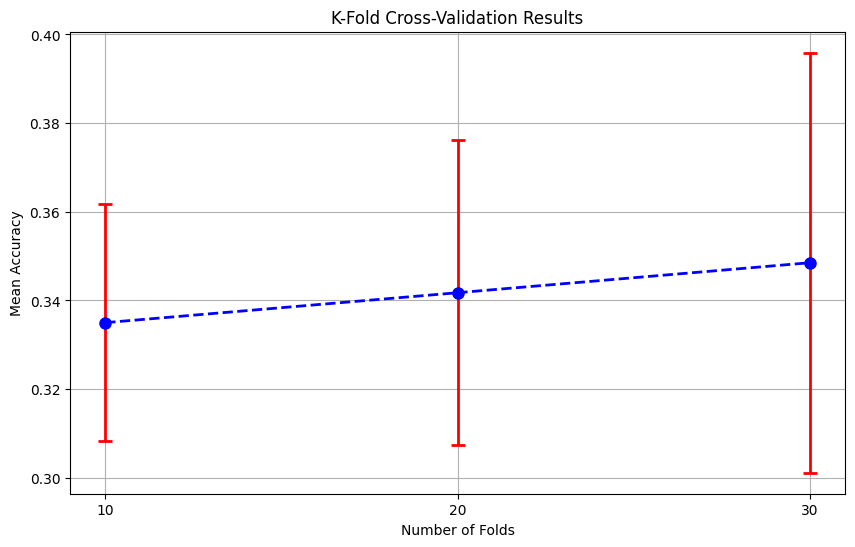

   Number of Folds  Mean Accuracy  Standard Deviation
0               10           0.34                0.03
1               20           0.34                0.03
2               30           0.35                0.05


In [40]:
# Visualize comparison of k-fold cross-validation results
k_values = [item[0] for item in kfold_accuracies]
mean_accuracies = [item[1] for item in kfold_accuracies]
std_devs = [item[2] for item in kfold_accuracies]

plt.figure(figsize=(10, 6))
plt.errorbar(k_values, mean_accuracies, yerr=std_devs, fmt='o', capsize=5, capthick=2, color='blue', ecolor='red', linestyle='--', linewidth=2, markersize=8)
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Number of Folds')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Comparison table of k-fold cross-validation results
cv_results_df = pd.DataFrame(kfold_accuracies, columns=['Number of Folds', 'Mean Accuracy', 'Standard Deviation'])
print(cv_results_df)
